<a href="https://colab.research.google.com/github/Harsha-Sankarasetty/Stock_Prediction/blob/main/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas requests pandas-ta

In [ ]:

!pip install pandas-ta

In [ ]:
!pip install "numpy<2.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 80.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
pip install nltk

In [ ]:
!pip install pandas-ta

In [ ]:
!pip install "numpy<2.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 109.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training the enhanced LSTM model...
Epoch 1/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.0171
Epoch 2/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0032
Epoch 3/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0022
Epoch 4/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0022
Epoch 5/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0019
Epoch 6/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0016
Epoch 7/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0016
Epoch 8/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0015
Epoch 9/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0014
Epoch 10/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0016
Epoch 11/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0015
Epoch 12/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0016
Epoch 13/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0015
Epoch 14/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0015
Epoch 1

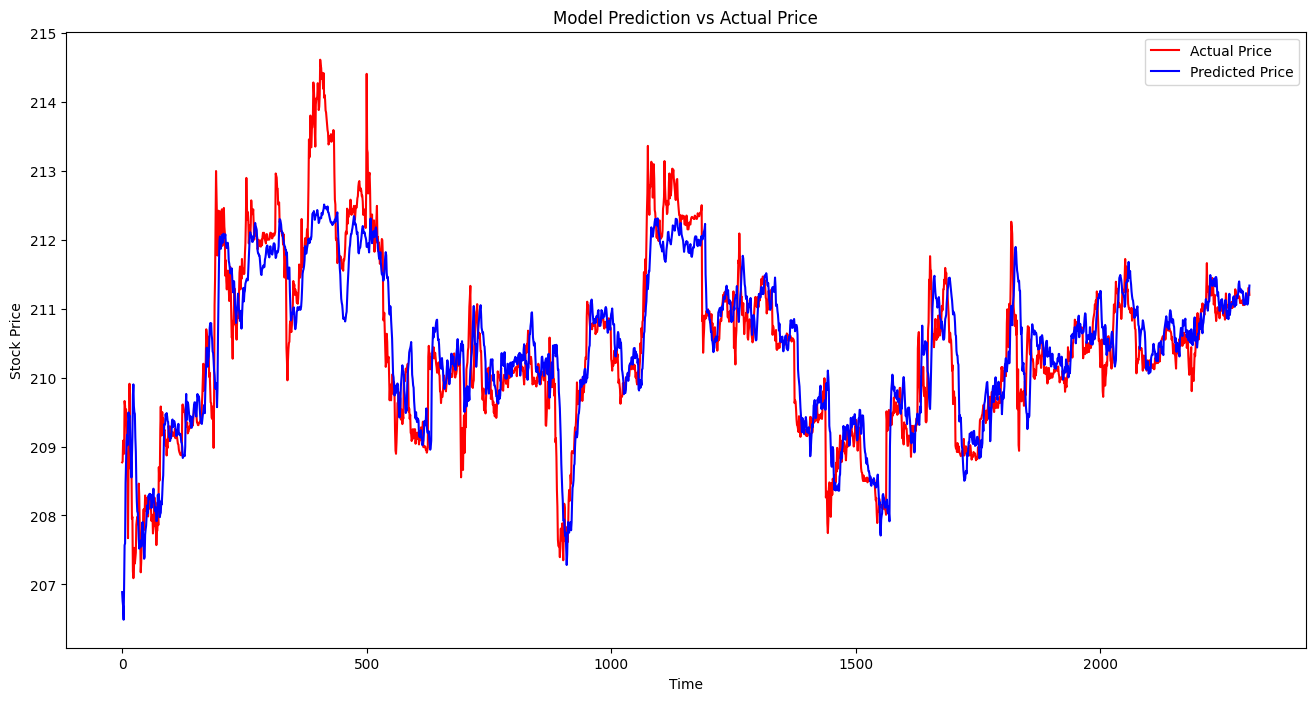

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# --- 1. Load and Prepare Data ---

# Load your final, feature-rich dataset
df = pd.read_csv('FINAL_AAPL_dataset_2025-04-20_to_2025-07-19.csv', index_col='timestamp', parse_dates=True)

# Separate the target variable and features
target = df['target'].values
features = df.drop('target', axis=1).values

# Scale features and target
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler_features.fit_transform(features)

scaler_target = MinMaxScaler(feature_range=(0, 1))
scaled_target = scaler_target.fit_transform(target.reshape(-1, 1))

# Create sequential data for the LSTM
X = []
y = []
sequence_length = 60

for i in range(sequence_length, len(scaled_features)):
    X.append(scaled_features[i-sequence_length:i])
    y.append(scaled_target[i, 0])

X, y = np.array(X), np.array(y)

# Split data into training and testing sets (80% train, 20% test)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


# --- 2. Build the Enhanced LSTM Model ---
model = Sequential()
model.add(LSTM(150, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(75, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(75, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dense(1))


# --- 3. Compile and Train the Model ---
model.compile(optimizer='adam', loss='mean_squared_error')
print("Training the enhanced LSTM model...")

model.fit(X_train, y_train, batch_size=32, epochs=50)


# --- 4. Evaluate the Model ---
print("Evaluating model performance...")
predictions = model.predict(X_test)
# Undo the scaling
predictions = scaler_target.inverse_transform(predictions)
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAPE and Accuracy Score
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
print(f"\nMean Absolute Percentage Error (MAPE): {mape:.2f}%")

accuracy = 100 - mape
print(f"Prediction Accuracy Score: {accuracy:.2f}%")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test_actual) ** 2)))
print(f"Model Root Mean Squared Error (RMSE): {rmse:.2f}")

# Visualize the results
plt.figure(figsize=(16,8))
plt.title('Model Prediction vs Actual Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.plot(y_test_actual, color='red', label='Actual Price')
plt.plot(predictions, color='blue', label='Predicted Price')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training the enhanced LSTM model...
Epoch 1/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0152
Epoch 2/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0030
Epoch 3/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0022
Epoch 4/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0019
Epoch 5/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0017
Epoch 6/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0016
Epoch 7/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0015
Epoch 8/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0017
Epoch 9/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0015
Epoch 10/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0015
Epoch 11/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0015
Epoch 12/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0015
Epoch 13/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0014
Epoch 14/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0014
Epoch 1

Saving trained model to 'stock_predictor.h5'...
Model saved successfully.
Evaluating model performance...
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Mean Absolute Percentage Error (MAPE): 0.20%
Prediction Accuracy Score: 99.80%
Model Root Mean Squared Error (RMSE): 0.60


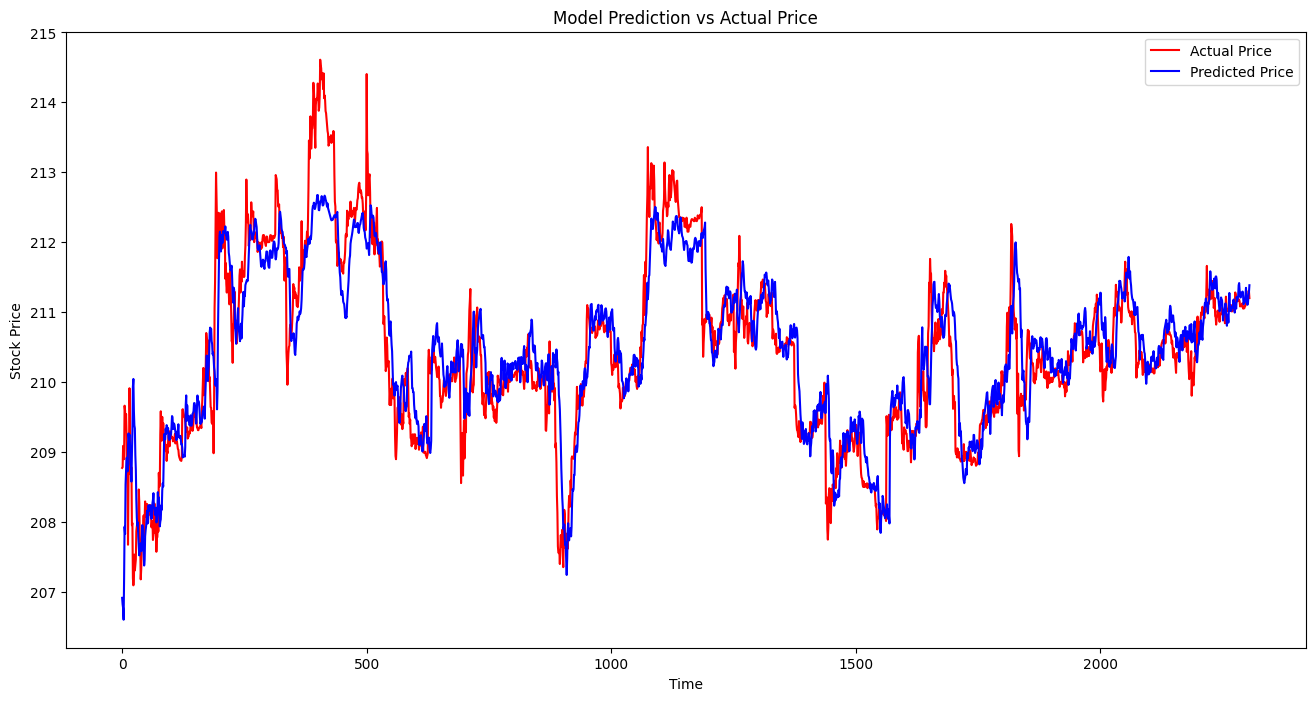

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# --- 1. Load and Prepare Data ---

# Load your final, feature-rich dataset
df = pd.read_csv('FINAL_AAPL_dataset_2025-04-20_to_2025-07-19.csv', index_col='timestamp', parse_dates=True)

# Separate the target variable and features
target = df['target'].values
features = df.drop('target', axis=1).values

# Scale features and target
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler_features.fit_transform(features)

scaler_target = MinMaxScaler(feature_range=(0, 1))
scaled_target = scaler_target.fit_transform(target.reshape(-1, 1))

# Create sequential data for the LSTM
X = []
y = []
sequence_length = 60

for i in range(sequence_length, len(scaled_features)):
    X.append(scaled_features[i-sequence_length:i])
    y.append(scaled_target[i, 0])

X, y = np.array(X), np.array(y)

# Split data into training and testing sets (80% train, 20% test)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


# --- 2. Build the Enhanced LSTM Model ---
model = Sequential()
model.add(LSTM(150, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(75, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(75, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dense(1))


# --- 3. Compile and Train the Model ---
model.compile(optimizer='adam', loss='mean_squared_error')
print("Training the enhanced LSTM model...")

model.fit(X_train, y_train, batch_size=32, epochs=50)


# --- 4. Save the Trained Model ---
print("Saving trained model to 'stock_predictor.h5'...")
model.save('stock_predictor.h5')
print("Model saved successfully.")


# --- 5. Evaluate the Model ---
print("Evaluating model performance...")
predictions = model.predict(X_test)
# Undo the scaling
predictions = scaler_target.inverse_transform(predictions)
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAPE and Accuracy Score
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
print(f"\nMean Absolute Percentage Error (MAPE): {mape:.2f}%")

accuracy = 100 - mape
print(f"Prediction Accuracy Score: {accuracy:.2f}%")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test_actual) ** 2)))
print(f"Model Root Mean Squared Error (RMSE): {rmse:.2f}")

# Visualize the results
plt.figure(figsize=(16,8))
plt.title('Model Prediction vs Actual Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.plot(y_test_actual, color='red', label='Actual Price')
plt.plot(predictions, color='blue', label='Predicted Price')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

# --- 1. Load Data and Trained Model ---

# Load your final dataset to get the last sequence and to fit the scalers
df = pd.read_csv('FINAL_AAPL_dataset_2025-04-20_to_2025-07-19.csv', index_col='timestamp', parse_dates=True)

# Load the model you saved after training
model = load_model('stock_predictor.h5')


# --- 2. Prepare the Last Data Sequence ---

# Define the sequence length used during training
sequence_length = 60

# Get the last 'sequence_length' rows from your feature set
last_sequence_raw = df.drop('target', axis=1).iloc[-sequence_length:]


# --- 3. Scale the Data ---

# Re-create and fit the scalers on the full dataset to ensure consistency
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_features.fit(df.drop('target', axis=1))

scaler_target = MinMaxScaler(feature_range=(0, 1))
scaler_target.fit(df[['target']])

# Scale the last sequence using the fitted scaler
scaled_last_sequence = scaler_features.transform(last_sequence_raw)

# Reshape for the model's input format
X_predict = np.reshape(scaled_last_sequence, (1, sequence_length, df.shape[1] - 1))


# --- 4. Make and Display the Prediction ---

# Predict the scaled value
predicted_price_scaled = model.predict(X_predict)

# Undo the scaling to get the actual dollar value
predicted_price = scaler_target.inverse_transform(predicted_price_scaled)

print("\n" + "="*40)
print(f"Predicted Stock Value for the Next Period: ${predicted_price[0][0]:.2f}")
print("="*40)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step

Predicted Stock Value for the Next Period: $211.40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training the enhanced LSTM model...
Epoch 1/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0198
Epoch 2/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0028
Epoch 3/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0025
Epoch 4/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0019
Epoch 5/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0020
Epoch 6/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0017
Epoch 7/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0016
Epoch 8/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0017
Epoch 9/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0016
Epoch 10/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0016
Epoch 11/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0015
Epoch 12/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0018
Epoch 13/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0016
Epoch 14/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0014
Epoch 1

Saving trained model to 'stock_predictor.h5'...
Model saved successfully.
Evaluating model performance...
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

Mean Absolute Percentage Error (MAPE): 0.43%
Prediction Accuracy Score: 99.57%
Model Root Mean Squared Error (RMSE): 1.03


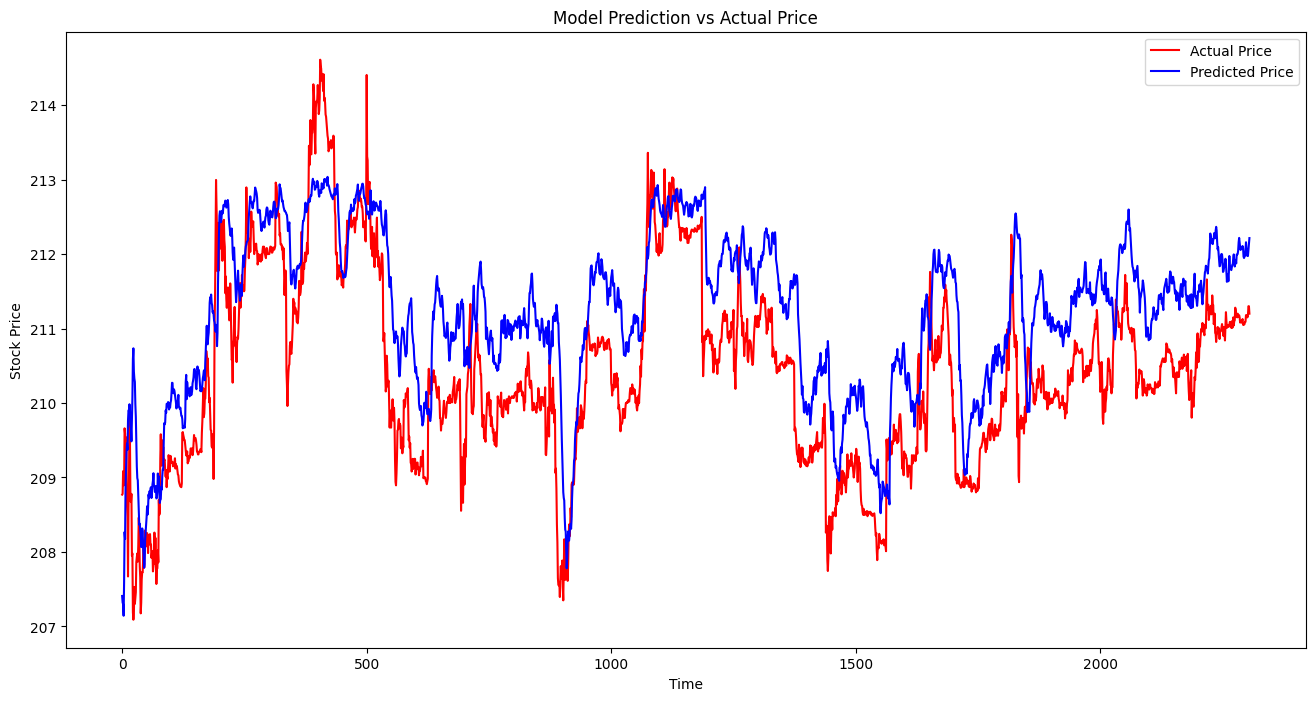


--- Predicting for a Specific Historical Point ---

Error: No data found for the specified timestamp: 2025-07-28 15:30:00
Please ensure the date and time exist in your dataset.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# --- 1. Load and Prepare Data ---

# Load your final, feature-rich dataset
df = pd.read_csv('FINAL_AAPL_dataset_2025-04-20_to_2025-07-19.csv', index_col='timestamp', parse_dates=True)

# Separate the target variable and features
target = df['target'].values
features = df.drop('target', axis=1).values

# Scale features and target
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler_features.fit_transform(features)

scaler_target = MinMaxScaler(feature_range=(0, 1))
scaled_target = scaler_target.fit_transform(target.reshape(-1, 1))

# Create sequential data for the LSTM
X = []
y = []
sequence_length = 60

for i in range(sequence_length, len(scaled_features)):
    X.append(scaled_features[i-sequence_length:i])
    y.append(scaled_target[i, 0])

X, y = np.array(X), np.array(y)

# Split data into training and testing sets (80% train, 20% test)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


# --- 2. Build the Enhanced LSTM Model ---
model = Sequential()
model.add(LSTM(150, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(75, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(75, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dense(1))


# --- 3. Compile and Train the Model ---
model.compile(optimizer='adam', loss='mean_squared_error')
print("Training the enhanced LSTM model...")

model.fit(X_train, y_train, batch_size=32, epochs=50)


# --- 4. Save the Trained Model ---
print("Saving trained model to 'stock_predictor.h5'...")
model.save('stock_predictor.h5')
print("Model saved successfully.")


# --- 5. Evaluate the Model ---
print("Evaluating model performance...")
predictions = model.predict(X_test)
# Undo the scaling
predictions = scaler_target.inverse_transform(predictions)
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAPE and Accuracy Score
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
print(f"\nMean Absolute Percentage Error (MAPE): {mape:.2f}%")

accuracy = 100 - mape
print(f"Prediction Accuracy Score: {accuracy:.2f}%")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test_actual) ** 2)))
print(f"Model Root Mean Squared Error (RMSE): {rmse:.2f}")

# Visualize the results
plt.figure(figsize=(16,8))
plt.title('Model Prediction vs Actual Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.plot(y_test_actual, color='red', label='Actual Price')
plt.plot(predictions, color='blue', label='Predicted Price')
plt.legend()
plt.show()


# --- 6. Predict for a Specific Historical Date ---
print("\n--- Predicting for a Specific Historical Point ---")

# Specify the date and time you want the model's prediction for
lookup_datetime_str = '2025-07-28 15:30:00'

try:
    # Find the index location for the specified timestamp
    lookup_datetime = pd.to_datetime(lookup_datetime_str).tz_localize('UTC')
    df_index = df.index.get_loc(lookup_datetime)

    # Find the corresponding index in the 'X' array
    # The 'X' array starts 'sequence_length' steps after the beginning of the DataFrame
    x_index = df_index - sequence_length

    if x_index < 0:
        print("Error: Not enough historical data before the lookup date to make a prediction.")
    else:
        # Get the specific sequence of data
        sequence_to_predict = X[x_index]

        # Reshape for model input
        X_predict = np.reshape(sequence_to_predict, (1, sequence_length, df.shape[1] - 1))

        # Make the prediction
        predicted_price_scaled = model.predict(X_predict)
        predicted_price = scaler_target.inverse_transform(predicted_price_scaled)

        # Get the actual value for comparison
        actual_price = df['target'].iloc[df_index]

        print("\n" + "="*50)
        print(f"Prediction for timestamp: {lookup_datetime_str} UTC")
        print(f"The model predicted a value of: ${predicted_price[0][0]:.2f}")
        print(f"The actual value was:           ${actual_price:.2f}")
        print("="*50)

except KeyError:
    print(f"\nError: No data found for the specified timestamp: {lookup_datetime_str}")
    print("Please ensure the date and time exist in your dataset.")